In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# veriyi içe aktar
veri = pd.read_csv("/content/olimpiyatlar.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
veri.rename(columns={'ID'    : 'id',
                     'Name'  : 'isim',
                     'Sex'   : 'cinsiyet',
                     'Age'   : 'yas',
                     'Height': 'boy',
                     'Weight': 'kilo',
                     'Team'  : 'takim',
                     'NOC'   : 'uok',
                     'Games' : 'oyunlar',
                     'Year'  : 'yil',
                     'Season': 'sezon',
                     'City'  : 'sehir',
                     'Sport' : 'spor',
                     'Event' : 'etkinlik',
                     'Medal' : 'madalya'}, inplace=True) # inplace = True dediğimiz zaman ismi değiştirilen veri otomatik olarak veri variable'a kaydedilir
veri.head(8)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
# drop metodu ile id ve oyunlar'ı çıkaralım
veri = veri.drop(["id", "oyunlar"], axis = 1) # axis = 1 sütunları çıkart demek
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
veri2 = veri.drop([4], axis = 0)
#4.satırı sil"""
veri2.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
# 1. Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:55]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

In [ ]:
veri_gecici = veri.copy() # gerçek veriyi kaybetmemek için veri_gecici değişkeni belirle
boy_kilo_liste = ["boy", "kilo"]

In [ ]:
for e in essiz_etkinlik: # etkinlik listesi içerisinde dolaş

    # etkinlik filtresi oluştur
    etkinlik_filtre = veri_gecici.etkinlik == e
    # veriyi etkinliğe göre filtrele
    veri_filtreli = veri_gecici[etkinlik_filtre]

    # boy ve kilo için etkinlik özelinde ortalama bul
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): # eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: # etkinlik özelinde ortalama yoksa tüm veri için ortalama bul
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    # etkinlik özelinde kayıp değerleri doldurulmuş veriyi veri geçiciye eşitle
    veri_gecici[etkinlik_filtre] = veri_filtreli

# kayıp değerleri giderilmiş geçici veriyi gerçek veri değişkenine eşitle
veri = veri_gecici.copy()
veri.info() # boy ve kilo sütunlarında kayıp değer sayısına bak


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
# 2. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
# yas değişkeni tanımlı olmayan örnekleri bul,
# tilda işareti ile tersini al
# yaş değişkeni tanımlı olan örnekleri bulmak için filtre oluştur
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş ortlaması: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş ortlaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
# 3. Madalya alamayan sporcuları veri setinden çıkaracağız.
# toplamda 231333 tane örnek için madalya değişkeni tanımlı değil
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [ ]:
# madalya değişkeni tanımlı olmayan örnekleri bul, (NaN)
# tilda işareti ile tersini al
# madalya değişkeni tanımlı olan örnekleri bulmak için filtre oluştur
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [ ]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
# Önümüzdeki bölümlerde kullanmak için veriyi kaydet
veri.to_csv("olimpiyatlar_temizlenmis.csv", index=False)

In [ ]:
 #öncelikli olarak histogram grafiğini elde edeceğimiz metodumuzu yazalım.
def plotHistogram(degisken):
    """
        Girdi: Değişken/sütun ismi
        Çıktı: Histogram grafiği
    """

    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "blue")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

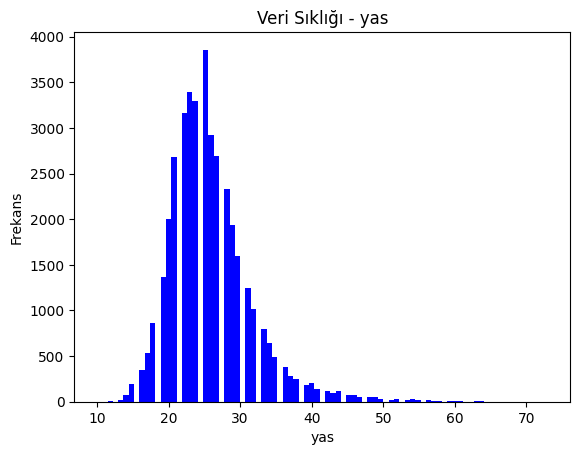

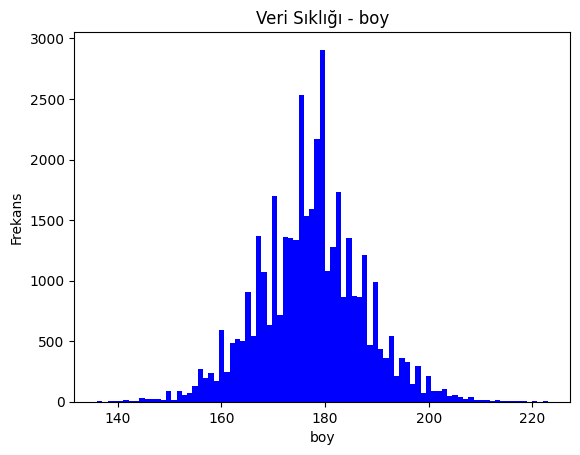

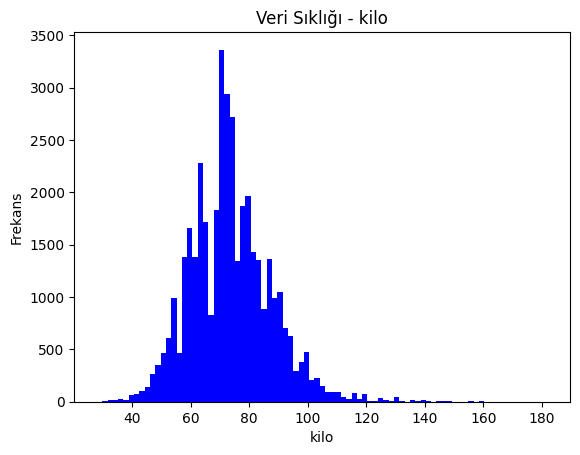

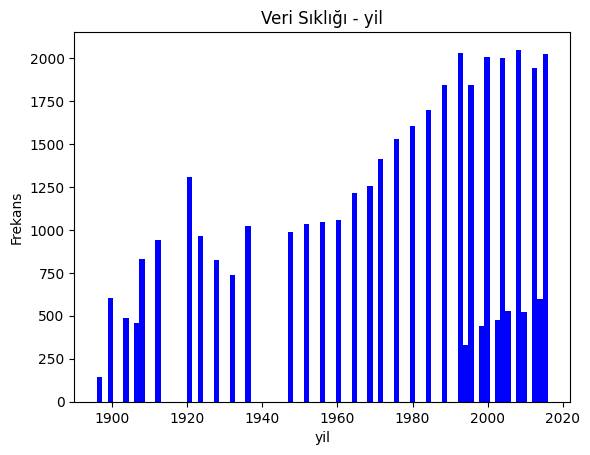

In [ ]:
# sayısal değişkenler için histogram çizdirelim
sayisal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayisal_degisken:
    plotHistogram(i)

In [ ]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


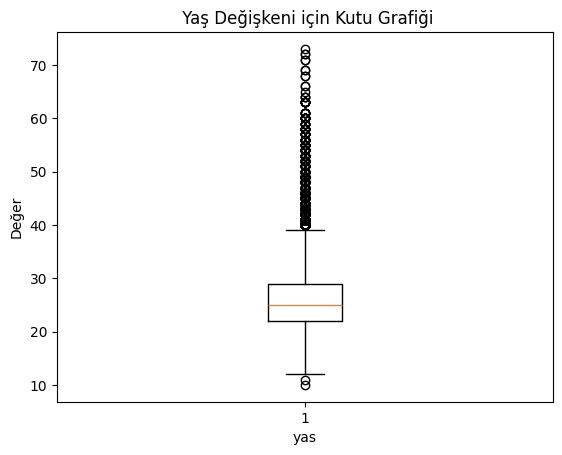

In [ ]:
# yas değişkeni için filtreyi uygulayıp sonra kutu grafiği çizdirelim
# aslında kutu grafiği çizdirmenin daha etkili yolları var, bu yolları görselleştirme bölümünde öğreneceğiz
plt.boxplot(veri.yas)
plt.title(" Yaş Değişkeni için Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("Değer")
plt.show()

In [ ]:
def plotBar(degisken,n = 6):
    """
        Girdi: Değişken/sütun ismi
               n = en önemli 10 eşsiz değer
        Çıktı: Bar grafiği
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "red")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))


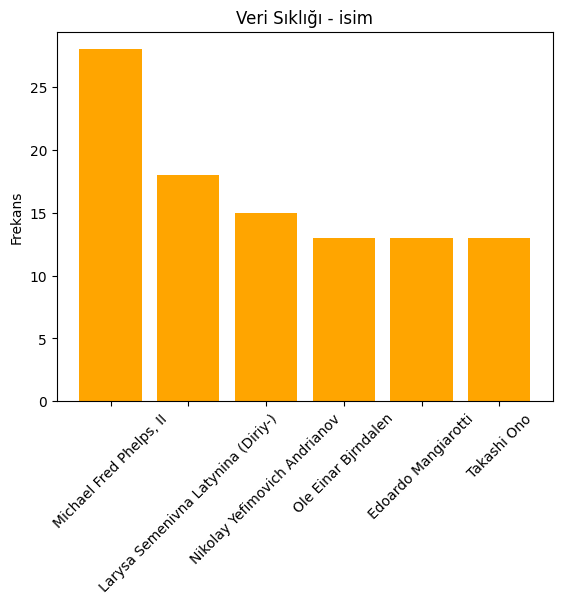

isim: 
 isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Takashi Ono                           13
Name: count, dtype: int64


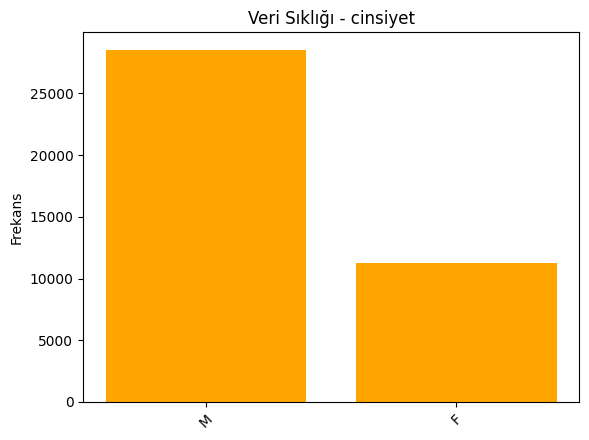

cinsiyet: 
 cinsiyet
M    28530
F    11253
Name: count, dtype: int64


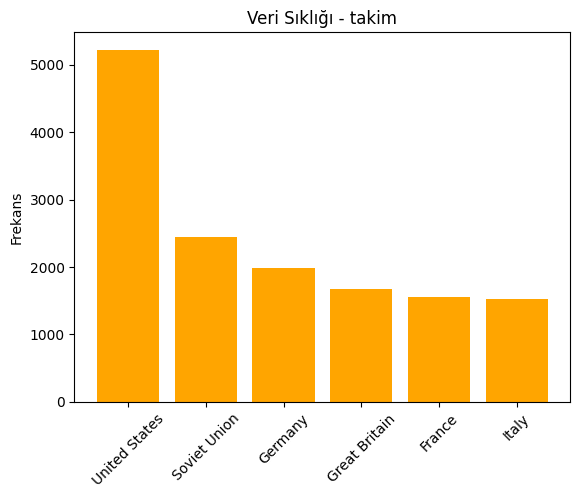

takim: 
 takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Name: count, dtype: int64


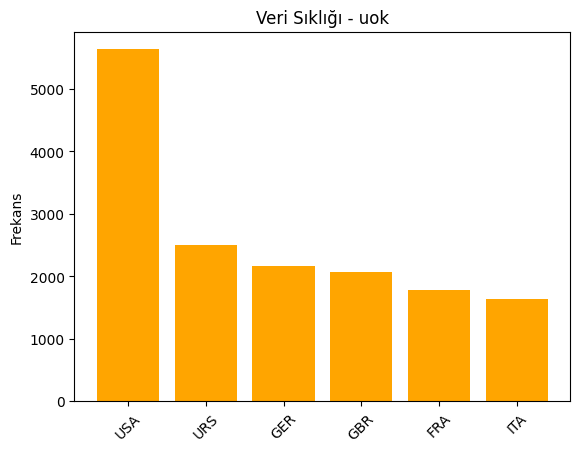

uok: 
 uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
Name: count, dtype: int64


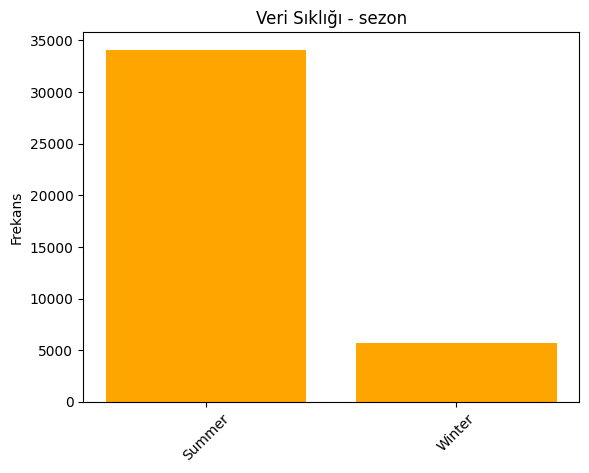

sezon: 
 sezon
Summer    34088
Winter     5695
Name: count, dtype: int64


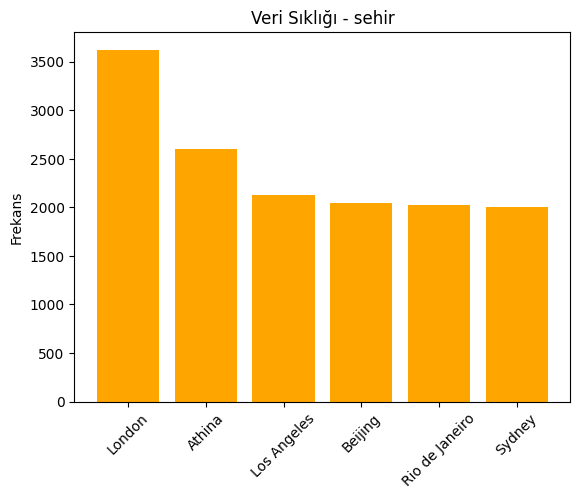

sehir: 
 sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Sydney            2004
Name: count, dtype: int64


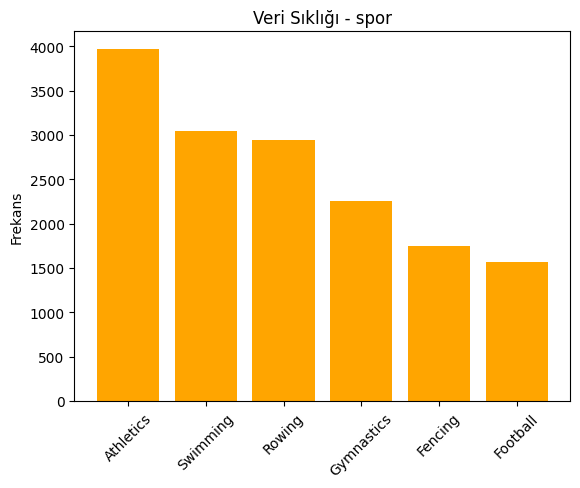

spor: 
 spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Football      1571
Name: count, dtype: int64


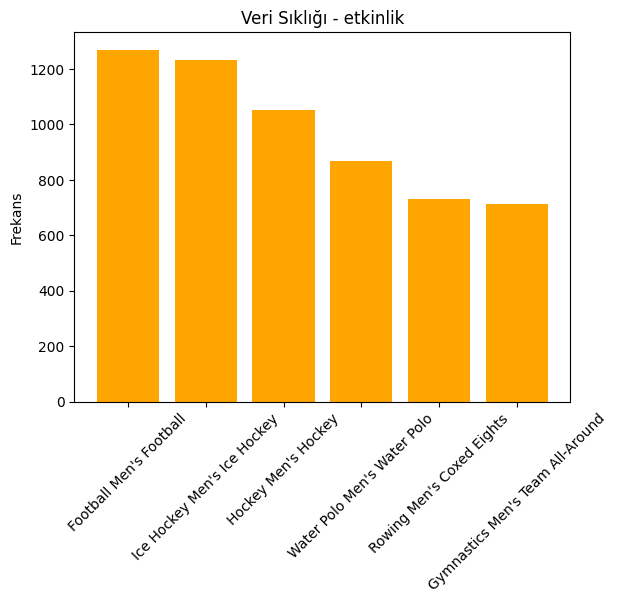

etkinlik: 
 etkinlik
Football Men's Football             1269
Ice Hockey Men's Ice Hockey         1230
Hockey Men's Hockey                 1050
Water Polo Men's Water Polo          866
Rowing Men's Coxed Eights            730
Gymnastics Men's Team All-Around     713
Name: count, dtype: int64


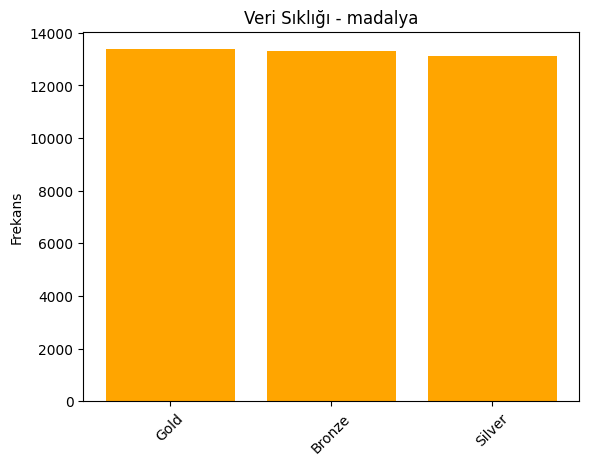

madalya: 
 madalya
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [ ]:
# sayısal değişkenler için histogram çizdirelim
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "sehir", "spor", "etkinlik", "madalya"]
for i in kategorik_degisken:
    plotBar(i)

# **Cinsiyete göre boy ve kilo karşılaştırması**

In [ ]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
195,Tamila Rashidovna Abasova,F,21.0,163.00,60.00,Russia,RUS,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
283,Margaret Ives Abbott (-Dunne),F,23.0,168.73,63.44,United States,USA,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
286,Monica Cecilia Abbott,F,23.0,191.00,88.00,United States,USA,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
311,Nia Nicole Abdallah,F,20.0,175.00,56.00,United States,USA,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
476,Reema Abdo,F,21.0,173.00,59.00,Canada,CAN,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze


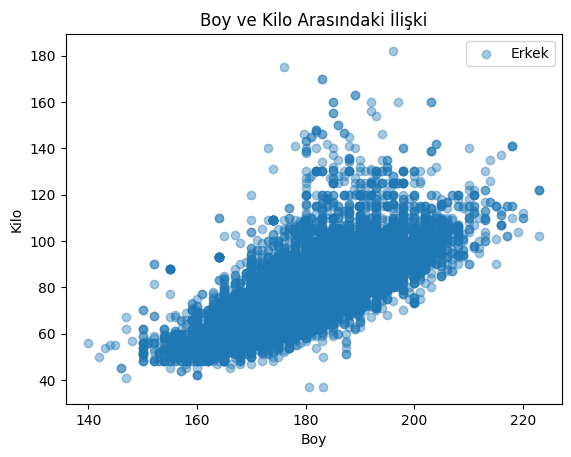

In [ ]:
# kadın ve erkek'ler arasında boy ilişkisine bakalım
plt.figure()
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

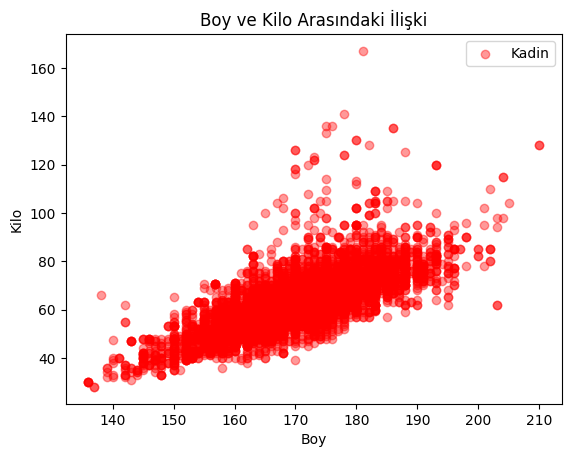

In [ ]:
# kadın ve erkek'ler arasında boy ilişkisine bakalım
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, color="red", alpha = 0.4, label = "Kadin")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [ ]:
countgold = 0
countsilver = 0
countbronze = 0
for i in kadin['madalya']:
  if i == 'Gold':
    countgold+=1
  elif i == 'Silver':
    countsilver+=1
  elif i == 'Bronze':
    countbronze+=1

kadin_madalyalari= pd.DataFrame({'Cinsiyet' :["kadin"],'Gold': [countgold], 'Silver': [countsilver], 'Bronze': [countbronze]})
print(kadin_madalyalari)

  Cinsiyet  Gold  Silver  Bronze
0    kadin  3747    3735    3771


In [ ]:
for i in erkek['madalya']:
  if i == 'Gold':
    countgold+=1
  elif i == 'Silver':
    countsilver+=1
  elif i == 'Bronze':
    countbronze+=1
erkek_madalyalari= pd.DataFrame({'Cinsiyet' :["erkek"],'Gold': [countgold], 'Silver': [countsilver], 'Bronze': [countbronze]})
print(erkek_madalyalari)

  Cinsiyet   Gold  Silver  Bronze
0    erkek  13372   13116   13295


In [ ]:
df_madalyalar = pd.concat([kadin_madalyalari, erkek_madalyalari], axis=0)
df_madalyalar

,Cinsiyet,Gold,Silver,Bronze
0,kadin,3747,3735,3771
0,erkek,13372,13116,13295


In [ ]:
# sayisal veriler arasında ilişki incelemesi
veri.loc[:,["yas","boy","kilo"]].corr() # korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


In [ ]:
# altin, gümüş ve bronz olacak şekilde 3 farklı gruba ayıralım.
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=['madalya'])
veri_gecici.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,True,False,False
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,True,False,False


In [ ]:
veri_gecici.loc[:,["yas","madalya_Bronze", "madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [ ]:
veri_gecici[["takim","madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["takim"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,takim,madalya_Gold,madalya_Silver,madalya_Bronze
462,United States,2474,1512,1233
403,Soviet Union,1058,716,677
165,Germany,679,627,678
215,Italy,535,508,484
171,Great Britain,519,582,572
149,France,455,518,577
420,Sweden,451,476,507
198,Hungary,432,330,365
67,Canada,422,413,408
117,East Germany,369,309,263


In [ ]:
veri_gecici[["sehir","madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["sehir"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,sehir,madalya_Gold,madalya_Silver,madalya_Bronze
17,London,1215,1195,1214
3,Athina,883,859,860
18,Los Angeles,726,691,706
6,Beijing,671,667,710
27,Rio de Janeiro,665,655,703
38,Sydney,663,661,680
4,Atlanta,608,605,629
5,Barcelona,559,549,604
33,Seoul,520,513,549
2,Antwerpen,493,448,367
